Audio Classifier
=========================

## Important information

* Choose a group name/number and rename the file with it.
* Be sure to enter the names of every member in the group in the cell below.
* Use the power of number and work together as a team.
* You can employ the use of the HPC (high perfomance computer) provided your server account has been established.
* The tutor is always available to give more explanation and assistance whenever/wherever required, but make sure you have made effort yourself.
* Please remove all test codes.
* The solutions to the tasks should be turn in on Friday 13th Dec, end of the day (12am). 
* A notebook submission is required per group, no multiple submissions from same group. Submit by attaching only the .ipynb file please, not zip and I don't need other files (e.g the data) I already have them.

Group 

    Mohammed Amidu
    Dilys Dickson
    Joseph Marie
    Vangelis Oden

This task is inspired by the Audio Classifier Tutorial (found [here](https://pytorch.org/tutorials/beginner/audio_classifier_tutorial.html?highlight=audio))
**Author**: `Winston Herring <https://github.com/winston6>`_

This tutorial will show you how to correctly format an audio dataset and
then train/test an audio classifier network on the dataset. First, let’s
import the common torch packages as well as ``torch``, ``torchaudio``, ``pandas``,
and ``numpy``. ``torchaudio`` is available `here <https://github.com/pytorch/audio>`_
and can be installed by following the
instructions on the website but I encountered a lot of trouble installing it, this ` conda install -c pytorch torchaudio-cpu ` rather worked for me.

If you have a CUDA GPU use that. Running
the network on a GPU will greatly decrease the training/testing runtime.




1: Importing the Dataset
---------------------

We will use the UrbanSound8K dataset to train our network. It is
available for free `here <https://urbansounddataset.weebly.com/>`_ and contains
10 audio classes with over 8000 audio samples! Once you have downloaded
the compressed dataset, extract it to your current working directory.
First, we will look at the csv file that provides information about the
individual sound files. ``pandas`` allows us to open the csv file and
use ``.iloc()`` to access the data within it.




The 10 audio classes in the UrbanSound8K dataset are air_conditioner,
car_horn, children_playing, dog_bark, drilling, enginge_idling,
gun_shot, jackhammer, siren, and street_music. Let’s play a couple files
and see what they sound like. The first file is street music and the
second is an air conditioner.




2: Formatting the Data
-------------------

Now that we know the format of the csv file entries, we can construct
our dataset. We will create a rapper class for our dataset using
``torch.utils.data.Dataset`` that will handle loading the files and
performing some formatting steps. The UrbanSound8K dataset is separated
into 10 folders. We will use the data from 9 of these folders to train
our network and then use the 10th folder to test the network. The rapper
class will store the file names, labels, and folder numbers of the audio
files in the inputted folder list when initialized. The actual loading
and formatting steps will happen in the access function ``__getitem__``.

In ``__getitem__``, we use ``torchaudio.load()`` to convert the wav
files to tensors. ``torchaudio.load()`` returns a tuple containing the
newly created tensor along with the sampling frequency of the audio file
(44.1kHz for UrbanSound8K). The dataset uses two channels for audio so
we will use ``torchaudio.transforms.DownmixMono()`` (not available in the latest version of `torchaudio`) to convert the audio
data to one channel. Next, we need to format the audio data. The network
we will make takes an input size of 32,000, while most of the audio
files have well over 100,000 samples. The UrbanSound8K audio is sampled
at 44.1kHz, so 32,000 samples only covers around 700 milliseconds. By
downsampling the audio to aproximately 8kHz, we can represent 4 seconds
with the 32,000 samples. This downsampling is achieved by taking every
fifth sample of the original audio tensor. Not every audio tensor is
long enough to handle the downsampling so these tensors will need to be
padded with zeros. The minimum length that won’t require padding is
160,000 samples.




3: Define the Network
------------------

For this task we want to closely reproduce the achitectures described in https://arxiv.org/pdf/1610.00087.pdf. You task is to read extensively the paper and reproduce the achitectures <font color='green'> M3, M5, M11 and M18. The M34-res is a bonus.</font>
While attempting to reproduce the architectures endeavour to read through the common [pitfalls](https://urbansounddataset.weebly.com/urbansound8k.html#10foldCV) to get it right.

We will use the same optimization technique used in the paper, an Adam
optimizer with weight decay set to 0.0001. At first, we will train with
a learning rate of 0.01, but we will use a ``scheduler`` to decrease it
to 0.001 during training.




4: Training and Testing the Network
--------------------------------

You can define a training function that will feed our training data into the model and perform the backward pass and optimization steps. You can also make one for testing the networks accuracy and set the model to ``eval()`` mode and then run inference on the test dataset. Calling ``eval()`` sets the training variable in all modules in the network to false. Certain layers like batch normalization and dropout layers behave differently during training so this step is crucial for getting correct results.




Finally, we can train and test the network. Train the network for as many epochs as time allows you. The network will be tested after each epoch to see how the accuracy varies during the training.

Conclusion
----------

If trained on 9 folders, the network should be about 40% accurate by the end of the training process for the least possible epochs. Training on less folders will result in a lower overall accuracy. Greater accuracies can be achieved using deeper CNNs at the expense of a larger memory footprint.

For more advanced audio applications, such as speech recognition,
recurrent neural networks (RNNs) are commonly used. There are also other
data preprocessing methods, such as finding the mel frequency cepstral
coefficients (MFCC), that can reduce the size of the dataset.




In [0]:
import os
import glob
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchaudio

In [0]:
#rapper for the UrbanSound8K dataset

In [1]:
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
!tar -xf UrbanSound8K.tar.gz

--2019-12-13 11:14:30--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  47.0MB/s    in 1m 52s  

2019-12-13 11:16:23 (51.4 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



In [2]:
!pip install librosa

In [1]:
# Import Useful Modules
import keras.backend as K
from keras import regularizers
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, BatchNormalization, Conv1D, Dense, GlobalAveragePooling1D, Input, MaxPooling1D, Lambda
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
import os
import pickle
from glob import glob
from random import choice
from time import time
from glob import iglob
from shutil import rmtree
import librosa
import numpy as np
import sys
from glob import glob
from sklearn.model_selection import KFold 

Using TensorFlow backend.


In [2]:
# Set Audio Paths
audio_path = '/home/michael/Documents/Programming#/Assignments#/UrbanSound8K/audio'
TARGET_SR = 8000
output_path = '/home/michael/Documents/Programming#/Assignments#/UrbanSound8K/Waveforms#'
output_path_train = os.path.join(output_path, 'train')
output_path_test = os.path.join(output_path, 'test')

audio_size = 32000

# Print trainable parameters from models
def print_total_trainable_parameters_count():
    import tensorflow as tf
    total_parameters = 0
    for variable in tf.trainable_variables():
        # shape is an array of tf.Dimension
        shape = variable.get_shape()
        print(shape)
        # print(len(shape))
        variable_parameters = 1
        for dim in shape:
            # print(dim)
            variable_parameters *= dim.value
        # print(variable_parameters)
        total_parameters += variable_parameters
    print(total_parameters)

def print_delimiter():
    print('-' * 80)

def mkdir_p(path):
    import errno
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def del_folder(path):
    try:
        rmtree(path)
    except:
        pass

# Extract classes from the dataset
def extract_class_id(wav_filename):
    """
    The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where:
    [fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
    [classID] = a numeric identifier of the sound class (see description of classID below for further details)
    [occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
    [sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence
    """
    return wav_filename.split('-')[1]

# Convert the dataset from the folders.
def convert_data():
    for i, wav_filename in enumerate(iglob(os.path.join(audio_path, '**/**.wav'), recursive=True)):
        class_id = extract_class_id(wav_filename)
        audio_buf = read_audio_from_filename(wav_filename, target_sr=TARGET_SR)
        # normalize mean 0, variance 1
        audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
        original_length = len(audio_buf)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf), 4), np.std(audio_buf))
        if original_length < audio_size:
            audio_buf = np.concatenate((audio_buf, np.zeros(shape=(audio_size - original_length, 1))))
            print('PAD New length =', len(audio_buf))
        elif original_length > audio_size:
            audio_buf = audio_buf[0:audio_size]
            print('CUT New length =', len(audio_buf))

        output_folder = output_path_train
        if 'fold10' in wav_filename:
            output_folder = output_path_test
        output_filename = os.path.join(output_folder, str(i) + '.pkl')

        out = {'class_id': class_id,
               'audio': audio_buf,
               'sr': TARGET_SR}
        with open(output_filename, 'wb') as w:
            pickle.dump(out, w)

def read_audio_from_filename(filename, target_sr):
    audio, _ = librosa.load(filename, sr=target_sr, mono=True)
    audio = audio.reshape(-1, 1)
    return audio


def next_batch_blank(batch_size):
    return np.zeros(shape=(batch_size, audio_size, 1), dtype=np.float32), np.ones(shape=batch_size)

def conv_pattern_extractor(pattern):
    pattern = pattern.replace('x', '*')
    num_blocks = 1
    if '*' in pattern:
        pattern, p2 = pattern.split('*')
        num_blocks = int(p2)
    pattern = pattern.strip()[1:-1]
    p1, p2 = pattern.split(',')
    nb_filters = int(p2)
    if '/' in p1:
        receptive_field, strides = [int(v) for v in p1.split('/')]
    else:
        receptive_field = int(p1)
        strides = 1
    print(nb_filters, receptive_field, strides, num_blocks)

In [3]:
# Class for logging our outputs to local machine.
class FileLogger(object):
    def __init__(self, full_filename, headers):
        self._headers = headers
        self._out_fp = open(full_filename, 'w')
        self._write(headers)

    def write(self, line):
        assert len(line) == len(self._headers)
        self._write(line)

    def close(self):
        self._out_fp.close()

    def _write(self, arr):
        arr = [str(e) for e in arr]
        self._out_fp.write(' '.join(arr) + '\n')
        self._out_fp.flush()

# Create a datareader class to Read the data and move it to batches
class DataReader:
    def __init__(self):
        self.train_files = glob(os.path.join(output_path_train, '**.pkl'))
        print('training files =', len(self.train_files))
        self.test_files = glob(os.path.join(output_path_test, '**.pkl'))
        print('testing files =', len(self.test_files))

    def next_batch_train(self, batch_size):
        return DataReader._next_batch(batch_size, self.train_files)

    def next_batch_test(self, batch_size):
        return DataReader._next_batch(batch_size, self.test_files)

    def train_files_count(self):
        return len(self.train_files)

    def test_files_count(self):
        return len(self.test_files)

    def get_all_training_data(self):
        return DataReader._get_data(self.train_files)

    def get_all_testing_data(self):
        return DataReader._get_data(self.test_files)

    @staticmethod
    def _get_data(file_list, progress_bar=False):
        def load_into(_filename, _x, _y):
            with open(_filename, 'rb') as f:
                audio_element = pickle.load(f)
                _x.append(audio_element['audio'])
                _y.append(int(audio_element['class_id']))

        x, y = [], []
        for filename in file_list:
            load_into(filename, x, y)
        return np.array(x), np.array(y)

    @staticmethod
    def _next_batch(batch_size, file_list):
        return DataReader._get_data([choice(file_list) for _ in range(batch_size)])

# Return all metrics
class MetricsHistory(Callback):
    def on_epoch_end(self, epoch, logs={}):
        file_logger.write([str(epoch),
                           str(logs['loss']),
                           str(logs['val_loss']),
                           str(logs['accuracy']),
                           str(logs['val_accuracy'])])

In [4]:
# Define M3 Network
def m3(num_classes=10):
    print('Using Model M3')
    m = Sequential()
    m.add(Conv1D(256,
                 input_shape=[audio_size, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))

    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1))) # Same as Global Average Pooling for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax')) # Dense Layers.
    return m

In [5]:
# Define M5 model 
def m5(num_classes=10):
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[audio_size, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1))) 
    m.add(Dense(num_classes, activation='softmax'))
    return m

In [6]:
# Define M11 network
def m11(num_classes=10):
    print('Using Model M11')
    m = Sequential()
    m.add(Conv1D(64,
                 input_shape=[audio_size, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(2):
        m.add(Conv1D(64,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(2):
        m.add(Conv1D(128,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(3):
        m.add(Conv1D(256,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(2):
        m.add(Conv1D(512,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))

    m.add(Lambda(lambda x: K.mean(x, axis=1)))
    m.add(Dense(num_classes, activation='softmax'))
    return m

In [7]:
# Define M18
def m18(num_classes=10):
    print('Using Model M18')
    m = Sequential()
    m.add(Conv1D(64,
                 input_shape=[audio_size, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(64,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(128,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(256,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))

    for i in range(4):
        m.add(Conv1D(512,
                     kernel_size=3,
                     strides=1,
                     padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=regularizers.l2(l=0.0001)))
        m.add(BatchNormalization())
        m.add(Activation('relu'))

    m.add(Lambda(lambda x: K.mean(x, axis=1))) 
    m.add(Dense(num_classes, activation='softmax'))
    return m

In [8]:

# For m34 Residual, use RepeatVector. Or tensorflow backend.repeat

def identity_block(input_tensor, kernel_size, filters, stage, block):
    conv_name_base = 'res' + str(stage) + str(block) + '_branch'
    bn_name_base = 'bn' + str(stage) + str(block) + '_branch'

    x = Conv1D(filters,
               kernel_size=kernel_size,
               strides=1,
               padding='same',
               kernel_initializer='glorot_uniform',
               kernel_regularizer=regularizers.l2(l=0.0001),
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv1D(filters,
               kernel_size=kernel_size,
               strides=1,
               padding='same',
               kernel_initializer='glorot_uniform',
               kernel_regularizer=regularizers.l2(l=0.0001),
               name=conv_name_base + '2b')(x)
    x = BatchNormalization(name=bn_name_base + '2b')(x)

    # up-sample from the activation maps.
    # here we x2 the number of filters.
    # See that as duplicating everything and concatenate them.
    if input_tensor.shape[2] != x.shape[2]:
        x = layers.add([x, Lambda(lambda y: K.repeat_elements(y, rep=2, axis=2))(input_tensor)])
    else:
        x = layers.add([x, input_tensor])

    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x


def resnet_34(num_classes=10):
    inputs = Input(shape=[audio_size, 1])

    x = Conv1D(48,
               kernel_size=80,
               strides=4,
               padding='same',
               kernel_initializer='glorot_uniform',
               kernel_regularizer=regularizers.l2(l=0.0001))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = MaxPooling1D(pool_size=4, strides=None)(x)

    for i in range(3):
        x = identity_block(x, kernel_size=3, filters=48, stage=1, block=i)

    x = MaxPooling1D(pool_size=4, strides=None)(x)

    for i in range(4):
        x = identity_block(x, kernel_size=3, filters=96, stage=2, block=i)

    x = MaxPooling1D(pool_size=4, strides=None)(x)

    for i in range(6):
        x = identity_block(x, kernel_size=3, filters=192, stage=3, block=i)

    x = MaxPooling1D(pool_size=4, strides=None)(x)

    for i in range(3):
        x = identity_block(x, kernel_size=3, filters=384, stage=4, block=i)

    x = GlobalAveragePooling1D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    m = Model(inputs, x, name='resnet34')
    return m

In [9]:
# del_folder(output_path_train)
# del_folder(output_path_test)
# mkdir_p(output_path_train)
# mkdir_p(output_path_test)

# conv_pattern_extractor('[80/4, 256] x 2')
# conv_pattern_extractor('[80/4, 256]')
# conv_pattern_extractor('[3, 512]')

# Run convert_data to downsample and upsample the data
# convert_data()
data_reader = DataReader()
a = time()
data_reader.next_batch_train(128)
print(time() - a, 'sec')
data_reader.next_batch_test(32)

training files = 7895
testing files = 837
0.08637261390686035 sec


(array([[[-0.28862223],
         [ 0.33379519],
         [ 1.05820024],
         ...,
         [ 1.00229537],
         [-0.34486553],
         [-0.48807079]],
 
        [[-0.85831708],
         [-1.31762409],
         [-0.20709692],
         ...,
         [-0.92532337],
         [-0.78980714],
         [-1.08291662]],
 
        [[ 0.02341719],
         [ 0.37758783],
         [ 0.878241  ],
         ...,
         [-3.03388095],
         [-3.08291292],
         [-3.30102062]],
 
        ...,
 
        [[ 0.11735019],
         [ 0.16110203],
         [ 1.01452184],
         ...,
         [ 0.18869561],
         [ 0.06019786],
         [ 1.00366247]],
 
        [[ 1.83861363],
         [ 2.30447245],
         [-0.09918652],
         ...,
         [-0.12858652],
         [-0.08820677],
         [ 0.03323535]],
 
        [[ 0.65142566],
         [ 0.48577085],
         [-0.57317448],
         ...,
         [-0.10246004],
         [-0.47736081],
         [ 1.81131577]]]),
 array([2, 9, 5, 5,

In [ ]:

model_names = ['m3', 'm5', 'm11', 'm18', 'm34']
for i in model_names:
    model_name = i
    args = sys.argv
    if len(args) == 2:
        model_name = args[1].lower()
    print('Model selected:', model_name)
    file_logger = FileLogger('out_{}.tsv'.format(model_name), ['step', 'train_loss', 'test_loss',
                                                               'train_acc', 'test_acc'])

    num_classes = 10
    if model_name == 'm3':
        model = m3(num_classes=num_classes)
    elif model_name == 'm5':
        model = m5(num_classes=num_classes)
    elif model_name == 'm11':
        model = m11(num_classes=num_classes)
    elif model_name == 'm18':
        model = m18(num_classes=num_classes)
    elif model_name == 'm34':
        model = resnet_34(num_classes=num_classes)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(model.summary())

    data_reader = DataReader()
    x_tr, y_tr = data_reader.get_all_training_data()
    y_tr = to_categorical(y_tr, num_classes=num_classes)
    x_te, y_te = data_reader.get_all_testing_data()
    y_te = to_categorical(y_te, num_classes=num_classes)

    print('x_tr.shape =', x_tr.shape)
    print('y_tr.shape =', y_tr.shape)
    print('x_te.shape =', x_te.shape)
    print('y_te.shape =', y_te.shape)

    # Reduce the learning rate by half if the accuracy does not increase after 10 epochs
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_lr=0.0001, verbose=1)
    metrics_history = MetricsHistory()
    batch_size = 128
    n_split = 10
    test_scores = []

    # Cross Validation for the training
    for train_index, val_index in KFold(n_split).split(x_tr):
        x_train, x_val = x_tr[train_index], x_tr[val_index]
        y_train, y_val = y_tr[train_index], y_tr[val_index]
        model.fit(x=x_train,
                  y=y_train,
                  batch_size=batch_size,
                  epochs=10,
                  verbose=1,
                  shuffle=True,
                  validation_data=(x_val, y_val),
                  callbacks=[metrics_history, reduce_lr])
        scores = model.evaluate(x_te, y_te, verbose=0)
        test_scores.append(scores[1] * 100)
    print("Final Accuracy %.2f%% (+/- %.2f%%)" % (numpy.mean(test_scores), numpy.std(test_scores)))

    file_logger.close() 

Model selected: m3
Using Model M3
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8000, 256)         20736     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8000, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 8000, 256)         0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2000, 256)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2000, 256)         196864    
_________________________________________________________________
batch_normalization_2 (Batch (None, 2000, 256)         1024      
_________________________________________________________________
activation_2 (Activa

In [0]:
pwd

'/home/michael/Documents/Programming#/Assignments#'

In [0]:
import pandas as pd
data_m3 = pd.read_csv('out_m31.csv')
data_m3.head()

,step,train_loss,test_loss,train_acc,test_acc
0,0,1.541343,2.390405,0.473211,0.118280
1,1,1.306810,2.663871,0.559721,0.133811
2,2,1.212127,2.484400,0.600887,0.238949
3,3,1.151480,2.022581,0.625332,0.290323
4,4,1.115919,1.857373,0.633692,0.397849


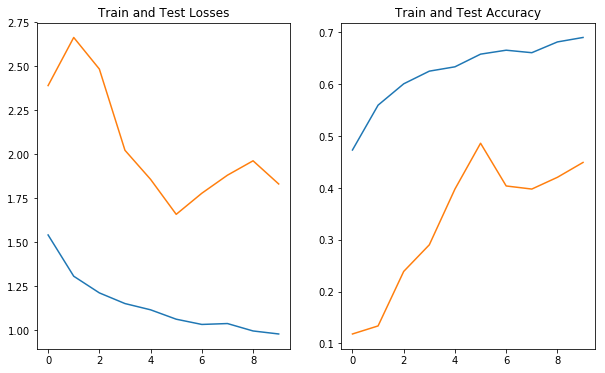

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize= (10, 6))
ax1.plot(data_m3.train_loss)
ax1.plot(data_m3.test_loss)
ax1.set_title('Train and Test Losses')
ax2.set_title('Train and Test Accuracy')
ax2.plot(data_m3.train_acc)
ax2.plot(data_m3.test_acc)

In [0]:
audio = torch.zeros(1,32000)
m3(audio.unsqueeze(0)).shape